In [ ]:
#install required packages
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *

!pip install category_encoders
import category_encoders as ce

# All matplot packages
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MultipleLocator
from tqdm import tqdm # progress slider for "for" loops
from tabulate import tabulate

#All sklearn packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 679.0 kB/s eta 0:00:00


# Load Data

In [ ]:
!gdown 1vtFUFQfnFBh5_zXyujB0aJQJYxG4aCBd

Downloading...
From: https://drive.google.com/uc?id=1vtFUFQfnFBh5_zXyujB0aJQJYxG4aCBd
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 93.1MB/s]


In [ ]:
#load the data
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Data Cleaning

In [ ]:
#handling missing values
for data in [df]:
    data['Age'] = data['Age'].fillna(data['Age'].median())
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
#seperate the titles for the passengers
for data in [df]:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

for data in [df]:
  data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  data['Title'] = data['Title'].replace('Mlle', 'Miss')
  data['Title'] = data['Title'].replace('Ms', 'Miss')
  data['Title'] = data['Title'].replace('Mme', 'Mrs')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
#dropping unnecessary columns
drop_columns = ['Cabin', 'PassengerId', 'Ticket','Name']
df.drop(columns=drop_columns, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [ ]:
#Use OneHotEncoder for categorical variables
ce_OHE = ce.OneHotEncoder(cols=['Embarked','Sex', 'Pclass', 'Title'],use_cat_names=True)
df_encoded = ce_OHE.fit_transform(df)
df_encoded = df_encoded.drop(['Sex_female'], axis=1)
df_encoded.head()

,Survived,Pclass_3.0,Pclass_1.0,Pclass_2.0,Sex_male,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Rare
0,0,1,0,0,1,22.0,1,0,7.2500,1,0,0,1,0,0,0,0
1,1,0,1,0,0,38.0,1,0,71.2833,0,1,0,0,1,0,0,0
2,1,1,0,0,0,26.0,0,0,7.9250,1,0,0,0,0,1,0,0
3,1,0,1,0,0,35.0,1,0,53.1000,1,0,0,0,1,0,0,0
4,0,1,0,0,1,35.0,0,0,8.0500,1,0,0,1,0,0,0,0


# Exploratory Data Analysis Graphs

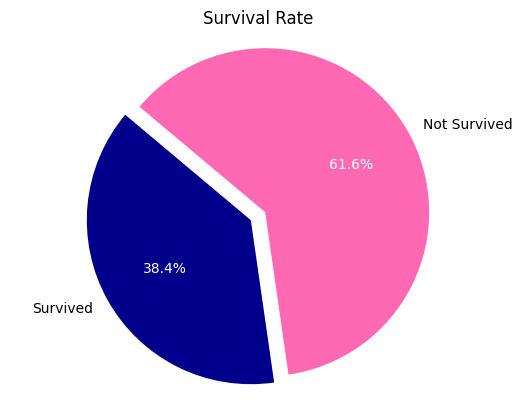

In [ ]:
# Survival Rate Pie Chart
survived_count = df['Survived'].sum()
not_survived_count = len(df) - survived_count

labels = ['Survived', 'Not Survived']
sizes = [survived_count, not_survived_count]
colors = ['darkblue', 'hotpink']
explode = (0.1, 0)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
                                  autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',
                                  startangle=140, textprops={'color':'black'})

# Set the autotexts (percent labels) color to white
for autotext in autotexts:
    autotext.set_color('white')

plt.axis('equal')
plt.title('Survival Rate')

plt.show()

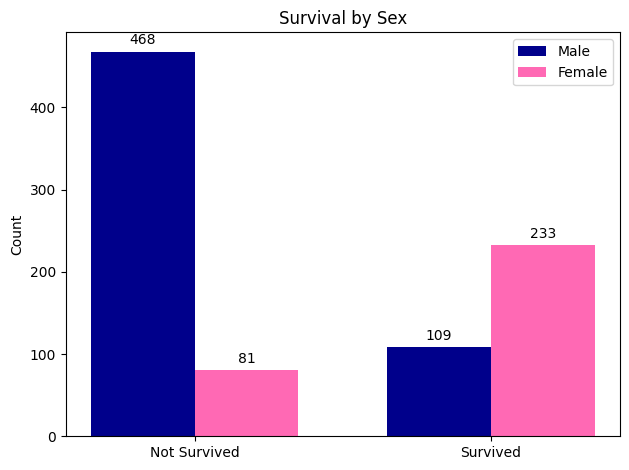

In [ ]:
# Sex and Suvival Rate Bar Chart
sex_survival_counts = df.groupby(['Survived', 'Sex']).size().unstack(fill_value=0)

# Plotting the bar chart
x = np.arange(len(sex_survival_counts.index))
bar_width = 0.35

fig, ax = plt.subplots()

bars1 = ax.bar(x - bar_width/2, sex_survival_counts['male'], bar_width, label='Male', color='darkblue')
bars2 = ax.bar(x + bar_width/2, sex_survival_counts['female'], bar_width, label='Female', color='hotpink')

ax.set_ylabel('Count')
ax.set_title('Survival by Sex')
ax.set_xticks(x)
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.legend()

# Add the value of count above the corresponding bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

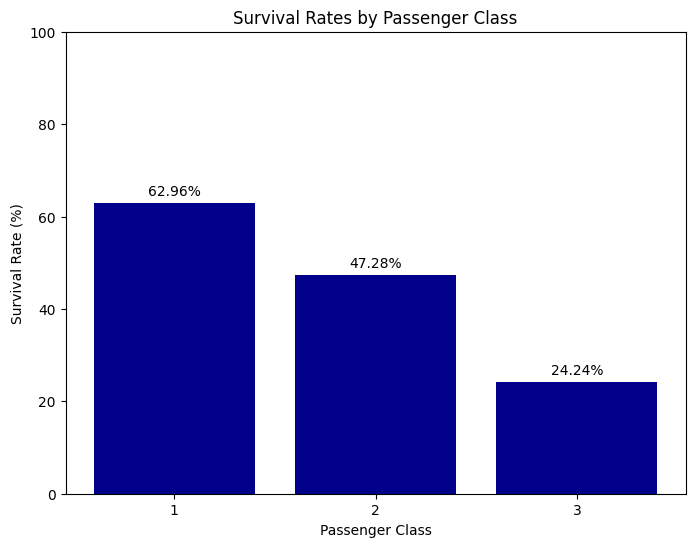

In [ ]:
#Wealth and Survival Rate Bar Chart
survival_rates = df.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(survival_rates.index, survival_rates.values, color=['darkblue'])

# Adding labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rates by Passenger Class')
plt.ylim(0, 100)

# Setting x-axis ticks and labels to whole numbers
plt.xticks(survival_rates.index, labels=[f'{int(cls)}' for cls in survival_rates.index])


# Adding percentages above each bar
for bar, percentage in zip(bars, survival_rates.values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 1,
             f'{percentage:.2f}%',
             ha='center',
             va='bottom',
             color='black')

plt.show()

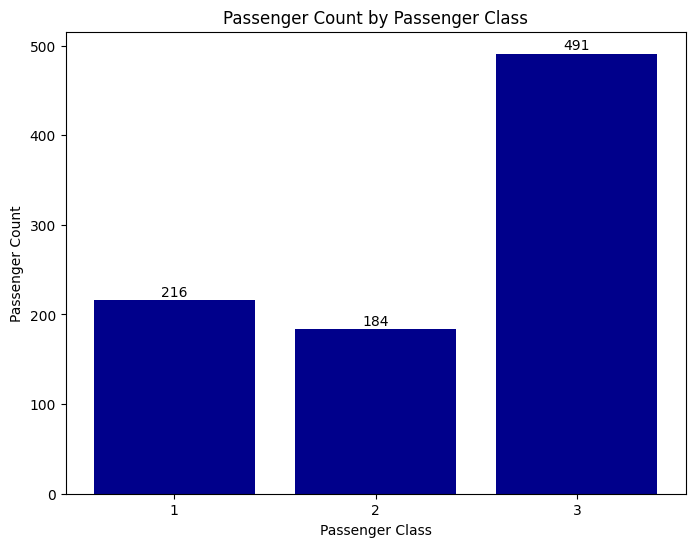

In [ ]:
#Passenger Count by Class Bar Chart
passenger_counts = df['Pclass'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(passenger_counts.index, passenger_counts.values, color='darkblue')

# Adding labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.title('Passenger Count by Passenger Class')

# Setting x-axis ticks and labels to whole numbers
plt.xticks(survival_rates.index, labels=[f'{int(cls)}' for cls in survival_rates.index])

# Adding value above each bar
for bar, count in zip(bars, passenger_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{count}',
             ha='center', va='bottom', color='black')

plt.show()

### Standardization scaling, name of df is standardized_df

In [ ]:
columns_to_standardize = ['Age', 'Fare']

# Standardize the selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[columns_to_standardize])

# Create a new DataFrame with standardized data
standardized_df = pd.DataFrame(scaled_data, columns=columns_to_standardize)

# Concatenate the standardized DataFrame with the remaining columns from df_encoded
standardized_df = pd.concat([standardized_df, df_encoded.drop(columns=columns_to_standardize)], axis=1)

# PCA

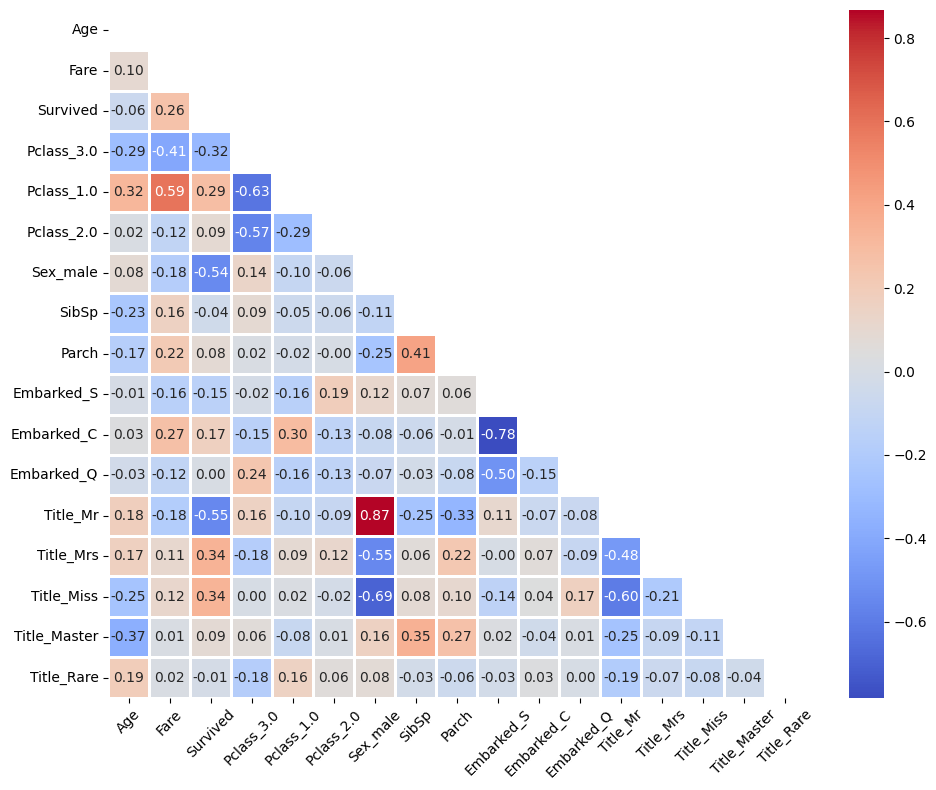

In [ ]:
# Calculate correlation matrix
corr_matrix = standardized_df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=1, linecolor='white', mask=mask)

#plt.title('Correlation Matrix', fontsize=20)  # Adjust title font size

# Rotate tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Variance Test:

Choosing # of Components: [source link](https://https://mikulskibartosz.name/pca-how-to-choose-the-number-of-components)

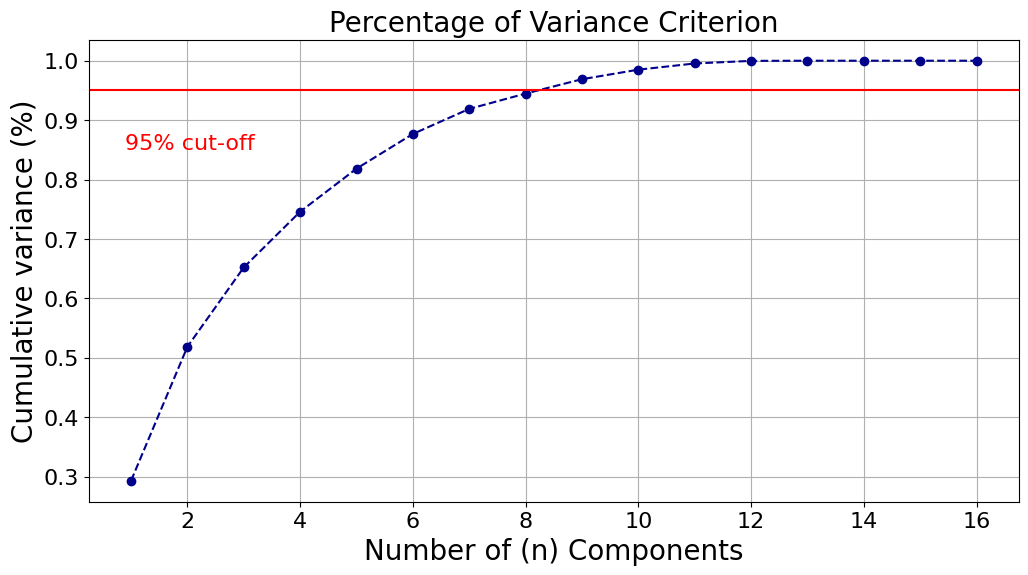

In [ ]:
X_scaled = standardized_df.drop(columns=['Survived'])

# Perform PCA
pca = PCA().fit(X_scaled)

# Plot scree plot
plt.figure(figsize=(12, 6))
xi = np.arange(1, len(X_scaled.columns) + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(xi, y, marker='o', linestyle='--', color='darkblue')

plt.xlabel('Number of (n) Components', fontsize=20)
plt.ylabel('Cumulative variance (%)', fontsize=20)
plt.title('Percentage of Variance Criterion', fontsize=20)

plt.grid(axis='x')
plt.grid(axis='y')
# Increase font size of tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.9, 0.85, '95% cut-off', color='red', fontsize=16)


plt.show()

## Latent Root:

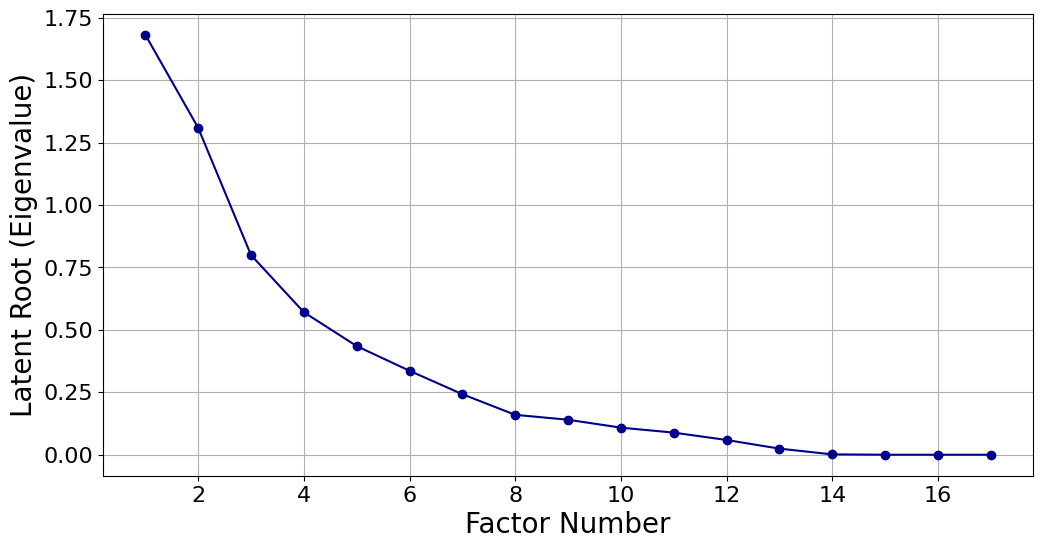

In [ ]:
# Compute the covariance matrix
cov_matrix = np.cov(standardized_df.values.T)

# Calculate the eigenvalues
eigenvalues = np.linalg.eigvals(cov_matrix)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='darkblue')
plt.xlabel('Factor Number', fontsize=20)
plt.ylabel('Latent Root (Eigenvalue)', fontsize=20)
# Increase font size of tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)

plt.show()

## Actual PCA Code

In [ ]:
X_scaled = standardized_df.drop(columns=['Survived'])

# PCA
pca = PCA(n_components= 8)  # number of components (determined above)
X_pca = pca.fit_transform(X_scaled)

# training and testing sets
y = standardized_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
loadings = pd.DataFrame(data=pca.components_.T, columns=['PC{}'.format(i+1) for i in range(8)], index=X_scaled.columns)

In [ ]:
# Print the top contributing features for each principal component
for i in range(8):
    pc = 'PC{}'.format(i+1)
    print(f"Top contributing features for {pc}:")
    sorted_features = loadings[pc].abs().sort_values(ascending=False)
    print(sorted_features.head())  # Adjust the number of top features you want to see, e.g., head(5)
    print("\n")

Top contributing features for PC1:
SibSp       0.740247
Parch       0.408316
Age         0.375836
Fare        0.290988
Title_Mr    0.176846
Name: PC1, dtype: float64


Top contributing features for PC2:
Fare          0.720644
Age           0.540964
Pclass_1.0    0.277861
Pclass_3.0    0.265234
Embarked_C    0.104482
Name: PC2, dtype: float64


Top contributing features for PC3:
Age           0.677192
SibSp         0.536057
Fare          0.373659
Title_Miss    0.176893
Sex_male      0.145468
Name: PC3, dtype: float64


Top contributing features for PC4:
Parch       0.524711
Sex_male    0.448133
Title_Mr    0.429124
Fare        0.307851
SibSp       0.265927
Name: PC4, dtype: float64


Top contributing features for PC5:
Parch         0.689663
Sex_male      0.370911
Title_Mr      0.348642
Title_Miss    0.295551
SibSp         0.283845
Name: PC5, dtype: float64


Top contributing features for PC6:
Embarked_S    0.539467
Pclass_3.0    0.503489
Pclass_2.0    0.487803
Embarked_C    0.344307
Emb

Top contributing features and their loadings for each principal component:
                 PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8
Age          -0.3758  0.5410 -0.6772  0.2026 -0.0626  0.1457 -0.0878 -0.1216
Fare          0.2910  0.7206  0.3737 -0.3079  0.1147 -0.0335 -0.2264 -0.0213
Pclass_3.0    0.0176 -0.2652 -0.0463 -0.0679  0.0723  0.5035 -0.4610  0.0991
Pclass_1.0    0.0036  0.2779  0.0647 -0.0719 -0.0532 -0.0157  0.0689  0.1448
Pclass_2.0   -0.0213 -0.0126 -0.0184  0.1398 -0.0192 -0.4878  0.3921 -0.2438
Sex_male     -0.1191 -0.0741 -0.1455 -0.4481  0.3709 -0.0008  0.1713 -0.0992
SibSp         0.7402 -0.0630 -0.5361 -0.2659 -0.2838 -0.0307  0.0620 -0.0095
Parch         0.4083  0.0611 -0.0556  0.5247  0.6897  0.1803  0.1153 -0.1338
Embarked_S    0.0023 -0.0718 -0.1339  0.0269  0.2079 -0.5395 -0.4742  0.1197
Embarked_C    0.0070  0.1045  0.1199 -0.0441 -0.1075  0.3443  0.4864  0.1029
Embarked_Q   -0.0093 -0.0327  0.0140  0.0171 -0.1004  0.1952 -0.0122 -0.2225
T

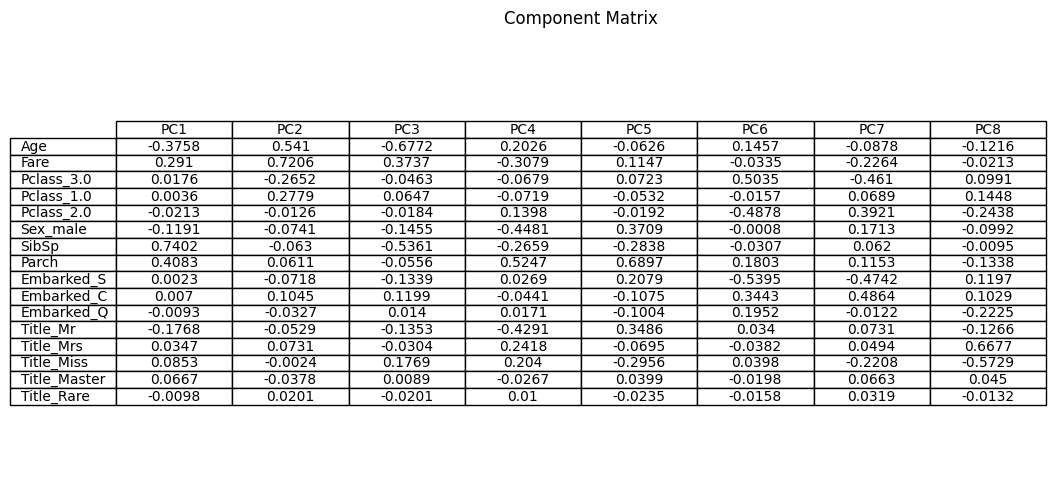

In [ ]:
# Function to create table visualization
def create_table(data, title):
    fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=data.values,
                     rowLabels=data.index,
                     colLabels=data.columns,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Adjust font size as needed
    ax.set_title(title)
    plt.show()

# Create DataFrame with top contributing features and their loadings for each principal component
top_features_df = pd.DataFrame(index=loadings.index)

for i in range(8):
    pc = 'PC{}'.format(i+1)
    sorted_features = loadings[pc].sort_values(ascending=False)
    top_features_df[pc] = sorted_features.round(4)  # Round to 2 decimal points

# Print and save the table
print("Top contributing features and their loadings for each principal component:")
print(top_features_df)
create_table(top_features_df, title="Component Matrix")

# Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.7932960893854749

In [ ]:
trialparam = {'n_estimators': [50,100,150,200,250],'criterion':['gini','entropy'],'max_depth':[3,5,6,7,9]}
grid = GridSearchCV(RandomForestClassifier(),param_grid=trialparam)
grid.fit(X_train,y_train)

# best parameters to run the random forest classifier
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 200}


In [ ]:
rfc =RandomForestClassifier(criterion=grid.best_params_['criterion'],max_depth=grid.best_params_['max_depth'],n_estimators=grid.best_params_['n_estimators'], random_state=8)
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(rfc.score(X_train, y_train))

0.8100558659217877
0.8469101123595506


In [ ]:
X_pca_copy = X_pca.copy()
X_pca_copy = pd.DataFrame(X_pca_copy, columns=[f"PC{i+1}" for i in range(X_pca_copy.shape[1])])

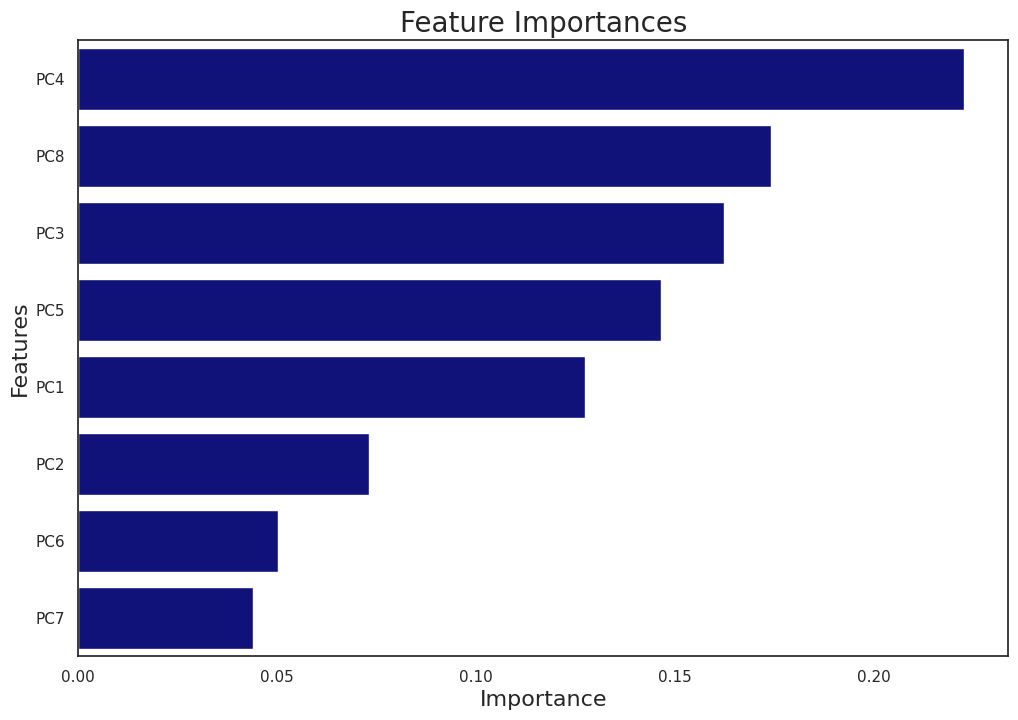

In [ ]:
sns.set(style="white", color_codes=True)
feature_importances = rfc.feature_importances_
features = X_pca_copy.columns
rf_fi = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
rf_fi_sorted = rf_fi.sort_values(by='Importance', ascending=False, ignore_index=True)


plt.figure(figsize=(12,8))
sns.barplot(data=rf_fi_sorted, y='Feature', x='Importance', color= 'darkblue')  # Corrected column names here
plt.title('Feature Importances', fontsize= 20)
plt.xlabel('Importance', fontsize= 16)
plt.ylabel('Features', fontsize= 16)
plt.show()

In [ ]:
print(accuracy_score(y_test, rfc.predict(X_test)))
rf=confusion_matrix(y_test, rfc.predict(X_test))
rf

0.8100558659217877


array([[91, 14],
       [20, 54]])

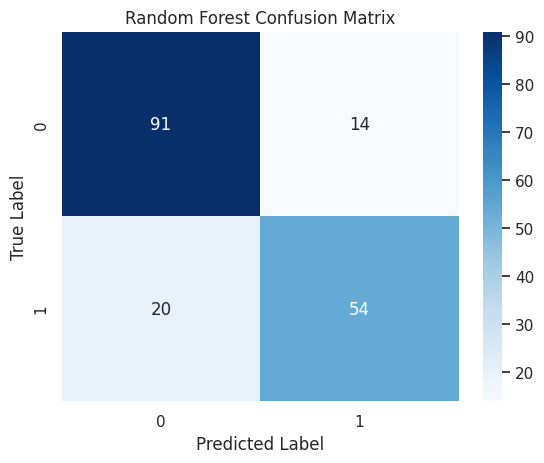

In [ ]:
# Then put it in a heatmap
sns.heatmap(rf, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7932960893854749


In [ ]:
results = []
for k in tqdm(range(1, 51, 1)):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })
results_df = pd.DataFrame(results)
results_df

100%|██████████| 50/50 [00:00<00:00, 61.28it/s]


,k,accuracy
0,1,0.793296
1,2,0.804469
2,3,0.815642
3,4,0.793296
4,5,0.798883
5,6,0.821229
6,7,0.815642
7,8,0.810056
8,9,0.810056
9,10,0.804469


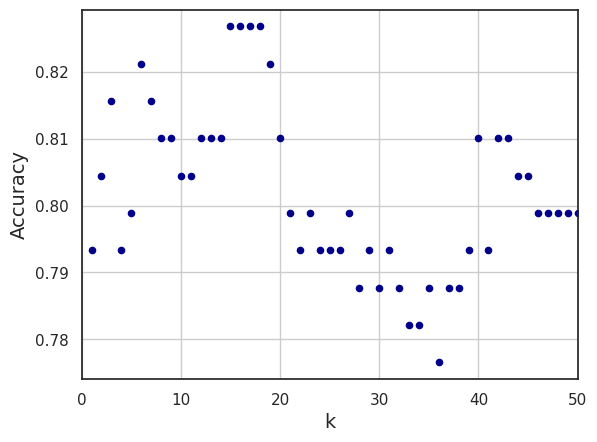

In [ ]:
#Plot Accuracy and K
jz=results_df.plot.scatter(x='k', y='accuracy', xlim=[0, 50], color = 'darkblue');
jz.set_xlabel('k', fontsize=14)
jz.set_ylabel('Accuracy', fontsize=14)
jz.grid(True)

In [ ]:
#Find the max value of accuracy and the corresponding k value
max_val = results_df['accuracy'].max()
max_val_idx = results_df['accuracy'].idxmax()
print("Max value =", max_val, '|', " Best k =", results_df['k'][max_val_idx])

Max value = 0.8268156424581006 |  Best k = 15


In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

pred_y = knn.predict(X_test)
print(confusion_matrix(y_test, pred_y))
print('Accuracy of test:', accuracy_score(y_test, pred_y))

y_pred_train = knn.predict(X_train)
print('Accuracy of train', accuracy_score(y_train, y_pred_train))


[[93 12]
 [19 55]]
Accuracy of test: 0.8268156424581006
Accuracy of train 0.8258426966292135


In [ ]:
print('Accuracy:', accuracy_score(y_test, pred_y))
knnc=(confusion_matrix(y_test, pred_y))
knnc

Accuracy: 0.8268156424581006


array([[93, 12],
       [19, 55]])

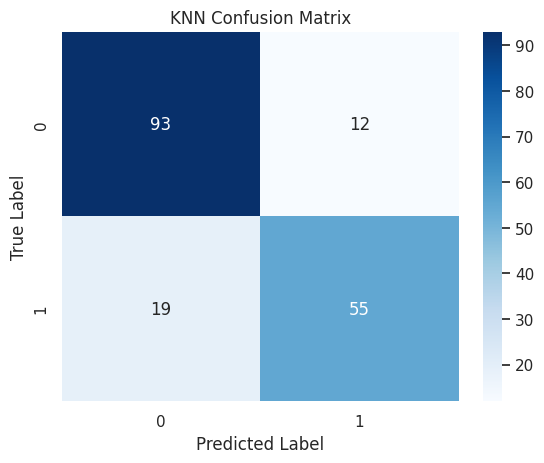

In [ ]:
# Plot a Confusion Matrix for KNN
sns.heatmap(knnc, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix')
plt.show()

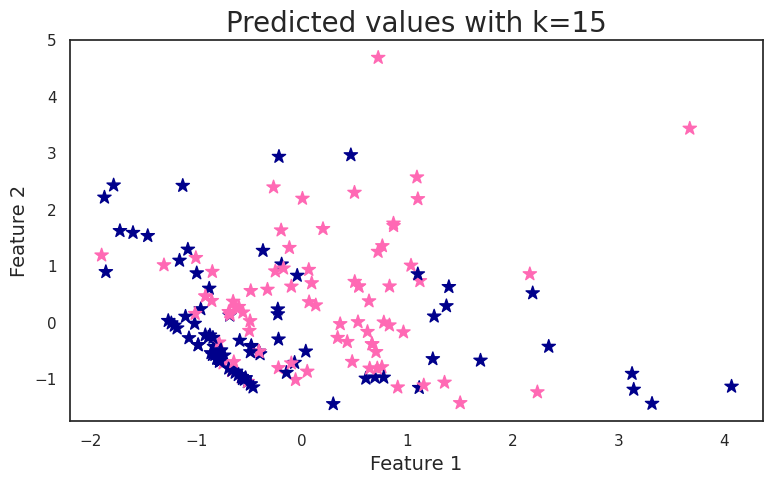

In [ ]:
cmap_light = ListedColormap(['darkblue', 'hotpink'])

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='*', s=100, cmap=cmap_light)
plt.title("Predicted values with k=15", fontsize=20)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)

plt.tight_layout()
plt.show()

# Cosine Similarity

In [ ]:
cosine_sim_matrix = cosine_similarity(X_train, X_train)

In [ ]:
# function to find the top N most similar passengers for a given passenger index
def find_top_similar(passenger_index, top_n):

    # Get all similarity scores for the passenger and sort them in descending order
    similarity_scores = list(enumerate(cosine_sim_matrix[passenger_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Select the top n scores (excluding the first one because it's the passenger itself)
    top_similar_indices = [i for i, score in similarity_scores[1:top_n+1]]

    return top_similar_indices

In [ ]:
y_train
y_train = y_train.reset_index(drop=True)


In [ ]:
# analysis for the first 10 passengers
for i in range(10):
    top_similar_indices = find_top_similar(i, 5) # Find the top 5 similar passengers

    # Extract survival rates of the most similar passengers
    similar_passengers_survival = y_train.iloc[top_similar_indices]

    passenger_survival_status = y_train.iloc[i]

    print(f"Passenger {i}'s survival status: {'Survived' if passenger_survival_status else 'Did not survive'}")
    print(f"Passenger {i}'s Top 5 Similar: {top_similar_indices}")
    print(f"Survival of the similar passengers: {similar_passengers_survival}")
    print(f"Average Survival Rate: {np.mean(similar_passengers_survival)}\n")


Passenger 0's survival status: Did not survive
Passenger 0's Top 5 Similar: [606, 265, 387, 557, 645]
Survival of the similar passengers: 606    1
265    0
387    0
557    1
645    0
Name: Survived, dtype: int64
Average Survival Rate: 0.4

Passenger 1's survival status: Did not survive
Passenger 1's Top 5 Similar: [217, 317, 130, 124, 154]
Survival of the similar passengers: 217    0
317    0
130    0
124    0
154    0
Name: Survived, dtype: int64
Average Survival Rate: 0.0

Passenger 2's survival status: Did not survive
Passenger 2's Top 5 Similar: [412, 443, 245, 147, 142]
Survival of the similar passengers: 412    1
443    0
245    0
147    1
142    1
Name: Survived, dtype: int64
Average Survival Rate: 0.6

Passenger 3's survival status: Did not survive
Passenger 3's Top 5 Similar: [497, 430, 336, 529, 244]
Survival of the similar passengers: 497    1
430    0
336    0
529    0
244    0
Name: Survived, dtype: int64
Average Survival Rate: 0.2

Passenger 4's survival status: Did not s

In [ ]:
def process_new_passenger(input_data):
    # Create a DataFrame for the new passenger
    df = pd.DataFrame([input_data])

    cols_to_standardize = ['Age', 'Fare']

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[cols_to_standardize])
    stand = pd.DataFrame(scaled_data, columns=cols_to_standardize)
    stand = pd.concat([stand, df.drop(columns=cols_to_standardize)], axis=1)

    df_pca = pca.transform(stand)

    # Compute cosine similarities with the training set
    cos_similarities = cosine_similarity(df_pca, X_train)

    # Find indices of the top 5 similar passengers
    top_indices = np.argsort(-cos_similarities[0])[:6]  # includes 6 to potentially exclude the first
    top_similar_indices = top_indices[1:6]  # skip the first one as it might be the highest (self-comparison)

    return top_similar_indices, y_train.iloc[top_similar_indices]


def print_passenger_analysis(top_similar_indices, similar_passengers_survival):
    print(f"Top 5 Similar Passenger Indices: {top_similar_indices}")
    print(f"Survival of the similar passengers: {similar_passengers_survival}")
    print(f"Average Survival Rate: {np.mean(similar_passengers_survival)}\n")


In [ ]:
# Example new passenger data
new_passenger = {
    'Age': 23, 'Fare': 10, 'Pclass_3.0': 1, 'Pclass_1.0': 0, 'Pclass_2.0': 0,
    'Sex_male': 1, 'SibSp':0, 'Parch': 0, 'Embarked_S': 0, 'Embarked_C': 1,
    'Embarked_Q': 0, 'Title_Mr': 1, 'Title_Mrs': 0, 'Title_Miss': 0,
    'Title_Master': 0, 'Title_Rare': 0
}
top_similar_indices, similar_passengers_survival = process_new_passenger(new_passenger)
print_passenger_analysis(top_similar_indices, similar_passengers_survival)


Top 5 Similar Passenger Indices: [432 619 200 231 330]
Survival of the similar passengers: 432    1
619    1
200    0
231    0
330    0
Name: Survived, dtype: int64
Average Survival Rate: 0.4



In [ ]:
# Example new passenger data
new_passenger2 = {
    'Age': 45, 'Fare': 50, 'Pclass_3.0': 0, 'Pclass_1.0': 1, 'Pclass_2.0': 0,
    'Sex_male': 0, 'SibSp': 1, 'Parch': 0, 'Embarked_S': 0, 'Embarked_C': 1,
    'Embarked_Q': 0, 'Title_Mr': 0, 'Title_Mrs': 1, 'Title_Miss': 0,
    'Title_Master': 0, 'Title_Rare': 0
}
top_similar_indices, similar_passengers_survival = process_new_passenger(new_passenger2)
print_passenger_analysis(top_similar_indices, similar_passengers_survival)


Top 5 Similar Passenger Indices: [241 298 223 609 406]
Survival of the similar passengers: 241    1
298    1
223    1
609    1
406    1
Name: Survived, dtype: int64
Average Survival Rate: 1.0



##Comparing the Models

In [ ]:
#RFC Accuracy
rfc_accuracy = rfc.score(X_test, y_test)
print("Random Forest Classifier Accuracy:", rfc_accuracy)

#KNN Accuracy
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)

# Compare the accuracy scores of all three methods
print("\nAccuracy Comparison:")
print("Random Forest Classifier Accuracy:", rfc_accuracy)
print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)

Random Forest Classifier Accuracy: 0.8100558659217877
K-Nearest Neighbors Classifier Accuracy: 0.8268156424581006

Accuracy Comparison:
Random Forest Classifier Accuracy: 0.8100558659217877
K-Nearest Neighbors Classifier Accuracy: 0.8268156424581006


In [ ]:
data = [
    ["Random Forest Classifier", rfc_accuracy],
    ["K-Nearest Neighbors Classifier", knn_accuracy]
]
print(tabulate(data, headers=["Method", "Accuracy"]))

Method                            Accuracy
------------------------------  ----------
Random Forest Classifier          0.810056
K-Nearest Neighbors Classifier    0.826816


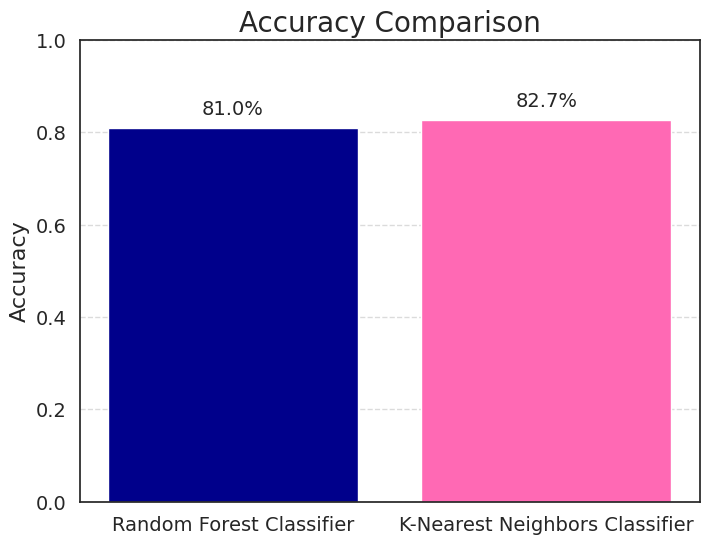

In [ ]:
# Convert accuracy scores to percentage
accuracy_scores = (rfc_accuracy, knn_accuracy)
methods = ("Random Forest Classifier", "K-Nearest Neighbors Classifier")
accuracy_scores_percent = [score * 100 for score in accuracy_scores]

plt.figure(figsize=(8, 6))
bars = plt.bar(methods, accuracy_scores, color=['darkblue', 'hotpink'])
#plt.xlabel('Method', fontsize=14)  # Increase axis font size
plt.ylabel('Accuracy', fontsize=16)  # Increase axis font size
plt.title('Accuracy Comparison', fontsize=20)  # Increase title font size

# Increase axis values font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add percentage labels above the bars
for bar, score in zip(bars, accuracy_scores_percent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.1f}%', ha='center', va='bottom', fontsize=14)  # Increase label font size

plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()